# Linear and Logistic Regression on Bank Marketing Dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             accuracy_score, confusion_matrix, classification_report)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Dataset
df = pd.read_csv('bank.csv')
print("Shape:", df.shape)
df.head()

Shape: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  str  
 2   marital    11162 non-null  str  
 3   education  11162 non-null  str  
 4   default    11162 non-null  str  
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  str  
 7   loan       11162 non-null  str  
 8   contact    11162 non-null  str  
 9   day        11162 non-null  int64
 10  month      11162 non-null  str  
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  str  
 16  deposit    11162 non-null  str  
dtypes: int64(7), str(10)
memory usage: 1.4 MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Data Preprocessing

In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Total missing values: 0


In [6]:
# Encode categorical variables using LabelEncoder
df_encoded = df.copy()
label_encoders = {}

categorical_cols = df_encoded.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.head()

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


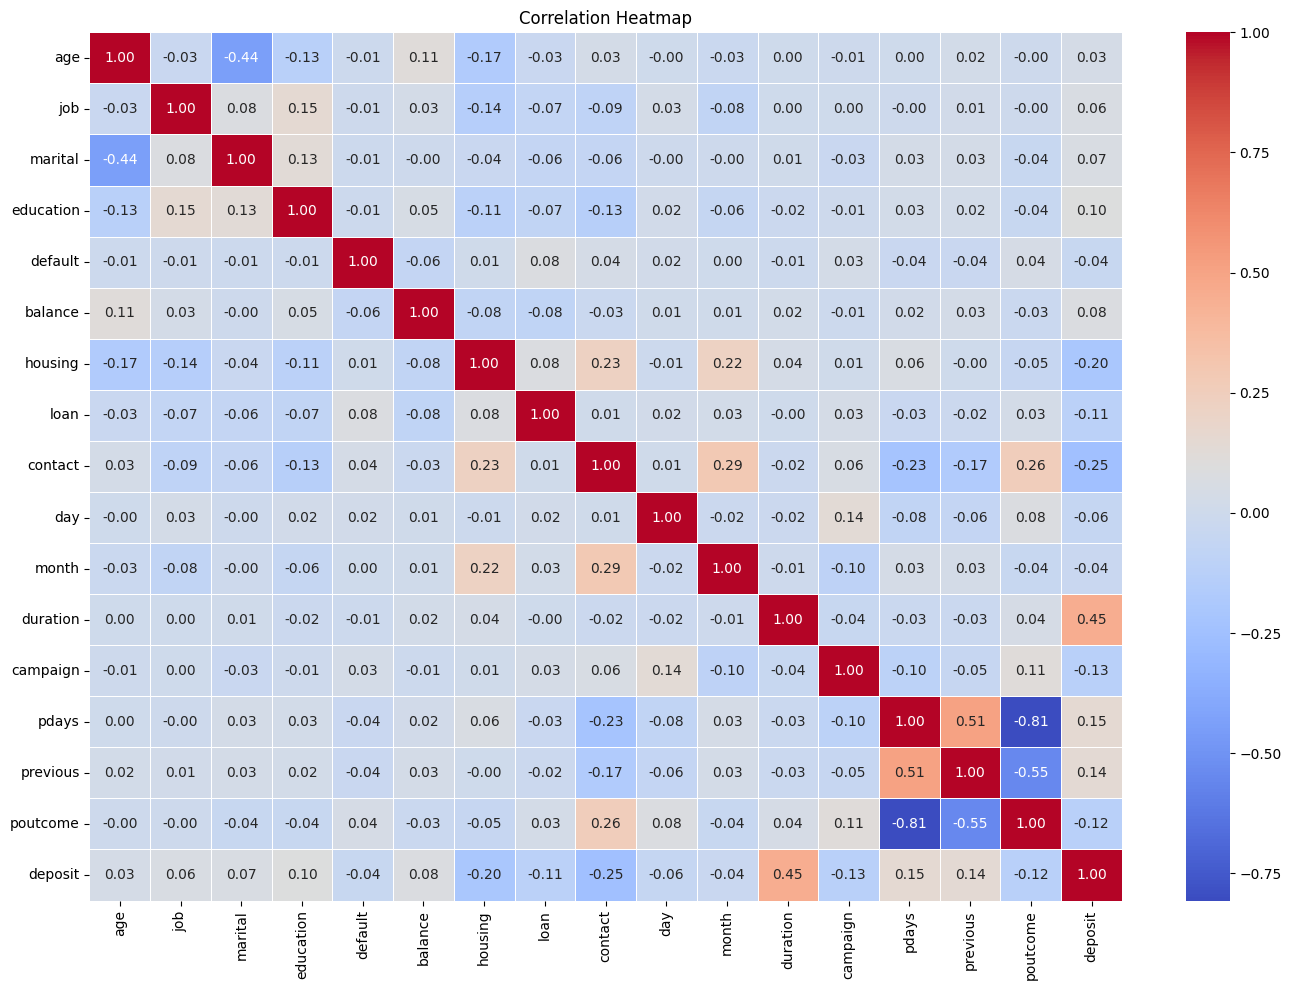

In [7]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

---
## Linear Regression
**Objective:** Predict `balance` (continuous variable) using other features.

In [8]:
# Prepare data for Linear Regression
X_lin = df_encoded.drop(columns=['balance'])
y_lin = df_encoded['balance']

# Train-Test Split (80-20)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_lin.shape[0]}")
print(f"Test set size:     {X_test_lin.shape[0]}")

Training set size: 8929
Test set size:     2233


In [9]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_lin, y_train_lin)

# Predictions
y_pred_lin = lr_model.predict(X_test_lin)

# Evaluation Metrics
mae = mean_absolute_error(y_test_lin, y_pred_lin)
mse = mean_squared_error(y_test_lin, y_pred_lin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lin, y_pred_lin)

print("=== Linear Regression Results ===")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Mean Squared Error (MSE)  : {mse:.2f}")
print(f"Root Mean Squared Error   : {rmse:.2f}")
print(f"R² Score                  : {r2:.4f}")

=== Linear Regression Results ===
Mean Absolute Error (MAE) : 1642.83
Mean Squared Error (MSE)  : 12266599.31
Root Mean Squared Error   : 3502.37
R² Score                  : 0.0340


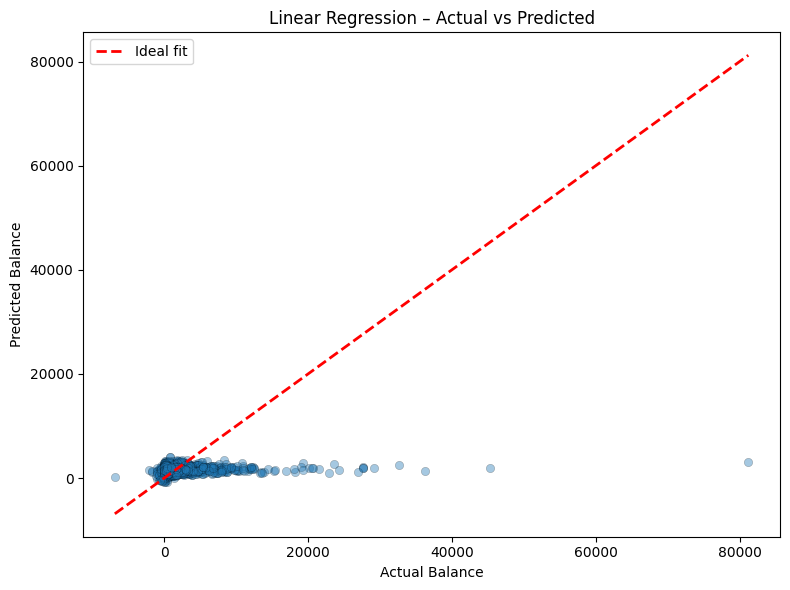

In [10]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_lin, y_pred_lin, alpha=0.4, edgecolors='k', linewidths=0.3)
plt.plot([y_test_lin.min(), y_test_lin.max()],
         [y_test_lin.min(), y_test_lin.max()], 'r--', lw=2, label='Ideal fit')
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.title('Linear Regression – Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()

---
## Logistic Regression
**Objective:** Predict `deposit` (yes / no — binary classification) using other features.

In [11]:
# Prepare data for Logistic Regression
X_log = df_encoded.drop(columns=['deposit'])
y_log = df_encoded['deposit']

# Train-Test Split (80-20)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_log.shape[0]}")
print(f"Test set size:     {X_test_log.shape[0]}")
print(f"\nClass distribution in target:")
print(y_log.value_counts())

Training set size: 8929
Test set size:     2233

Class distribution in target:
deposit
0    5873
1    5289
Name: count, dtype: int64


In [12]:
# Train Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_log, y_train_log)

# Predictions
y_pred_log = log_model.predict(X_test_log)

# Evaluation Metrics
accuracy = accuracy_score(y_test_log, y_pred_log)

print("=== Logistic Regression Results ===")
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test_log, y_pred_log, target_names=['No', 'Yes']))

=== Logistic Regression Results ===
Accuracy: 0.7850

Classification Report:
              precision    recall  f1-score   support

          No       0.79      0.80      0.80      1166
         Yes       0.78      0.77      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.79      0.78      2233



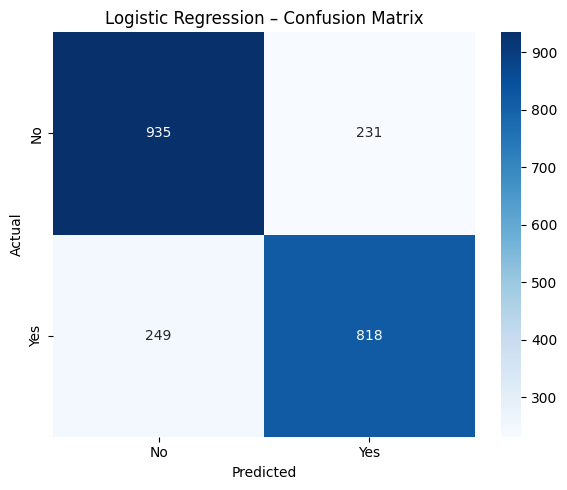

In [13]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test_log, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression – Confusion Matrix')
plt.tight_layout()
plt.show()

---
## Conclusion

| Model | Task | Key Metric |
|---|---|---|
| **Linear Regression** | Predict `balance` (continuous) | R² Score, RMSE |
| **Logistic Regression** | Predict `deposit` (binary) | Accuracy, Precision, Recall, F1 |

- **Linear Regression** was used to predict the client's bank `balance` from demographic and campaign features.
- **Logistic Regression** was used to classify whether a client will subscribe to a term deposit (`deposit`: yes/no).
- Both models were evaluated using standard metrics and visualizations.